In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("IMDB_sample.csv")
imb = pd.DataFrame(data)
imb = imb.drop('Unnamed: 0', axis=1)
imb.head()

,review,label
0,This short spoof can be found on Elite's Mille...,0
1,A singularly unfunny musical comedy that artif...,0
2,"An excellent series, masterfully acted and dir...",1
3,The master of movie spectacle Cecil B. De Mill...,1
4,I was gifted with this movie as it had such a ...,0


#### ANALISIS PALABRAS Y NUBE

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


imb2 = imb.copy()
tokens = [word_tokenize(sentence) for sentence in imb2['review']]

for i in tokens:
        for j in i:
            if ((j.isalpha() == False) or (j in stopwords.words('english'))):
                i.remove(j)

len_words = []
for i in range(len(tokens)):
    len_words.append(len(tokens[i]))
    

imb2['n_words'] = len_words
imb2.head(5)

,review,label,n_words
0,This short spoof can be found on Elite's Mille...,0,103
1,A singularly unfunny musical comedy that artif...,0,413
2,"An excellent series, masterfully acted and dir...",1,81
3,The master of movie spectacle Cecil B. De Mill...,1,88
4,I was gifted with this movie as it had such a ...,0,151


In [5]:
## SENTIMENT
from textblob import TextBlob 
imb2['Polaridad'] = imb2['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
imb2['Subjetividad'] = imb2['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
imb2.head()

,review,label,n_words,Polaridad,Subjetividad
0,This short spoof can be found on Elite's Mille...,0,103,-0.096667,0.548333
1,A singularly unfunny musical comedy that artif...,0,413,0.187243,0.504024
2,"An excellent series, masterfully acted and dir...",1,81,0.270166,0.608120
3,The master of movie spectacle Cecil B. De Mill...,1,88,0.157833,0.615333
4,I was gifted with this movie as it had such a ...,0,151,0.133519,0.551626


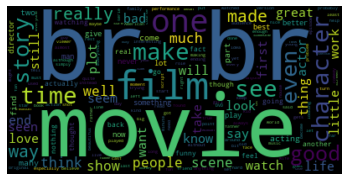

In [44]:
#NUBE DE PALABRAS
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#REVIEW JOIN
all_text = " ".join(rev for rev in imb2.review)
#CLOUD
cloud_words = WordCloud(stopwords=STOPWORDS).generate(all_text)
plt.imshow(cloud_words, interpolation='bilinear')
plt.axis('off')
plt.show()

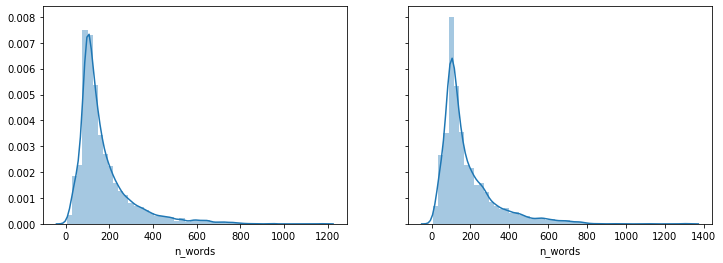

In [51]:
import seaborn as sns
df_0 = imb2[imb2['label']== 0]
df_1 = imb2[imb2['label']== 1]

fig, (ax0,ax1) = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(12,4))
sns.distplot(df_0['n_words'], ax=ax0)
sns.distplot(df_1['n_words'], ax=ax1)
plt.show()

#### VECTORIZACION

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

vect = TfidfVectorizer(ngram_range=(1,2), max_features=200, stop_words=ENGLISH_STOP_WORDS,token_pattern=r'\b[^\d\W][^\d\W]+\b')
X = vect.fit_transform(imb['review'])

In [14]:
New_imb = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print(New_imb.shape)
New_imb.head()

(7501, 200)


,acting,action,actor,actors,actually,american,audience,away,bad,beautiful,...,wife,woman,women,work,world,worst,worth,year,years,young
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.070525,0.000000,0.0,0.082068,0.0,0.0,0.100147,0.0,0.0,0.099804,...,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.199219,0.0,0.000000
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.335568,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.292340
3,0.000000,0.217319,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.208256
4,0.000000,0.114076,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.660883,0.10068,0.0,0.0,0.0,0.000000,0.0,0.000000


In [15]:
New_imb['label'] =  imb['label']
New_imb.head()

,acting,action,actor,actors,actually,american,audience,away,bad,beautiful,...,woman,women,work,world,worst,worth,year,years,young,label
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0
1,0.070525,0.000000,0.0,0.082068,0.0,0.0,0.100147,0.0,0.0,0.099804,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.199219,0.0,0.000000,0
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.292340,1
3,0.000000,0.217319,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.208256,1
4,0.000000,0.114076,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.660883,0.10068,0.0,0.0,0.0,0.000000,0.0,0.000000,0


In [16]:
from sklearn.model_selection import train_test_split
Y = New_imb['label']
X = New_imb.drop('label', axis='columns')

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=456)

model = LogisticRegression()
model.fit(X_train,Y_train)
Y_predic = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_predic)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       763
           1       0.76      0.77      0.76       738

    accuracy                           0.77      1501
   macro avg       0.77      0.77      0.77      1501
weighted avg       0.77      0.77      0.77      1501

